In [14]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.models import Model

In [15]:
np.random.seed(0)
(X_train, y_train), (X_test, y_test)= mnist.load_data()
num_of_samples=[]
 
cols = 5
num_classes = 10

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255

In [16]:
def leNet_model():
  # create model
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

model = leNet_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)              

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 41us/step - loss: 0.2105 - accuracy: 0.9320 - val_loss: 0.0518 - val_accuracy: 0.9835
Epoch 2/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0683 - accuracy: 0.9784 - val_loss: 0.0510 - val_accuracy: 0.9857
Epoch 3/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0550 - accuracy: 0.9834 - val_loss: 0.0484 - val_accuracy: 0.9873
Epoch 4/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0419 - val_accuracy: 0.9882
Epoch 5/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0440 - accuracy: 0.9866 - val_loss: 0.0446 - val_accuracy: 0.9887
Epoch 6/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0406 - accuracy: 0.9871 - val_loss: 0.0408 - val_accuracy: 0.9897
Epoch 7/10
54000/54000 [==============================] - 2s 35us/ste

Text(0.5, 0, 'epoch')

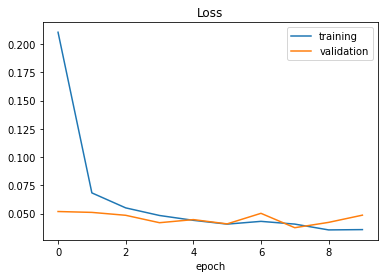

In [17]:
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

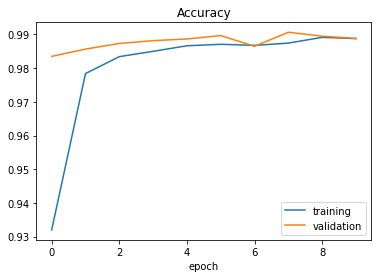

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [19]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.03322049828540636
Test accuracy: 0.991599977016449
